# Описание проекта

Из источников данных c информаицей о продажах игр, оценок пользователей, экспертов, жанрах и платформах необходимо выявить определяющие успешность игры закономерности. Определить самые популярные игры и платформы, распределение цены по годам. Определить перспективные продукты.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

# Шаг 1. Изучение общую информацию

In [2]:
data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')
data.head(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


# Шаг 2. Обработка данных

In [4]:
#Изменение названий столбцов
data.columns = data.columns.str.lower()
data.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
#Проверка на явные дубликаты
data.duplicated().sum()

0

### Обработка пропусков

In [6]:
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Данные объеткы имеют пропуски по многим позициям, удаление этих строк не повлияет на данные, а так же удалив их мы избавимся от пропусков в столбце 'name' и 'genre' 

In [7]:
data = data.drop([659,14244],axis = 0).reset_index().drop(columns='index')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [8]:
#Проверка пропусков в столбце 'user_score'
user_score_nan = data[data['user_score'].isna()].copy()
user_score_nan['user_score'] = user_score_nan['user_score'].fillna(1)
data['user_score_nan'] = 1
user_score_nan_percent = user_score_nan.pivot_table(index='year_of_release', values='user_score', aggfunc='sum').join(
    data.pivot_table(index='year_of_release', values='user_score_nan', aggfunc='sum')
    )
#Расчёт доли пропусков по годам
data = data.drop(columns='user_score_nan')
user_score_nan_percent['user_score_nan_percent'] = user_score_nan_percent['user_score']/user_score_nan_percent['user_score_nan']
user_score_nan_percent

,user_score,user_score_nan,user_score_nan_percent
year_of_release,,,
1980.0,9,9,1.000000
1981.0,46,46,1.000000
1982.0,36,36,1.000000
1983.0,17,17,1.000000
1984.0,14,14,1.000000
1985.0,13,14,0.928571
1986.0,21,21,1.000000
1987.0,16,16,1.000000
1988.0,14,15,0.933333


Доля пропусков до 2000 составляет 90-100%. Вероятнее всего до 2000 года, не было возможности оставлять оценки к играм у большинства пользователей (не было рейтинговых платформ, доступа к сети и.т.п.) Увеличение доли пропусков наблюдается с 2001 до 2012г.

In [9]:
#Проверки связи пропусков в стобцах 'rating', 'user_score', 'critic_score' 
data.loc[data['user_score'].isna()].loc[data['critic_score'].isna()].loc[data['rating'].isna()].shape[0]

6619

Большинство строк с пропусками в столбце 'critic_score',  так же имеют пропуски в столбцах 'user_score', 'rating', что говорит о зависимости этих данных между собой. Удалять эти строки не стоит, так как остаются важные данные, по платформе, жанру, продажах. Пропуски заполнять значениями не стоят,так как они могут исказить данные. 

In [10]:
#Значение tbd необходимо изменить на 'Nan', так как оно не определенно
data['user_score'] = data['user_score'].replace('tbd', np.NaN).fillna(-5).astype('float')

In [11]:
#Подсчёт суммарных продаж во всех регионах
data['sales_sum'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

In [12]:
temp = data.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().sum()/len(temp)*100, 2),'%')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       16713 non-null  float64
 10  rating           9949 non-null   object 
 11  sales_sum        16713 non-null  float64
dtypes: float64(8), object(4)
memory usage: 1.5+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio: Instant Artist' 'wwe Smackdown vs. Raw 2006'
 '¡Shin Chan Flipa en colores!

2.5 Удалить строки с пропусками в столбец 'year_of_release' 

In [13]:
data = data.dropna(subset=['year_of_release']).reset_index(drop=True)

Количество пропусков в столбец 'year_of_release' составляет всего 1.61%, следовательно данные строки можно удалить из датасета, так.к удаление не повлияет на общий анализ.

# Шаг 3 Исследовательский анализ данных

### 3.1 Определение количества игр по годам. Важность данных за все периоды

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_sum
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,-5.0,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,-5.0,NaN,31.38


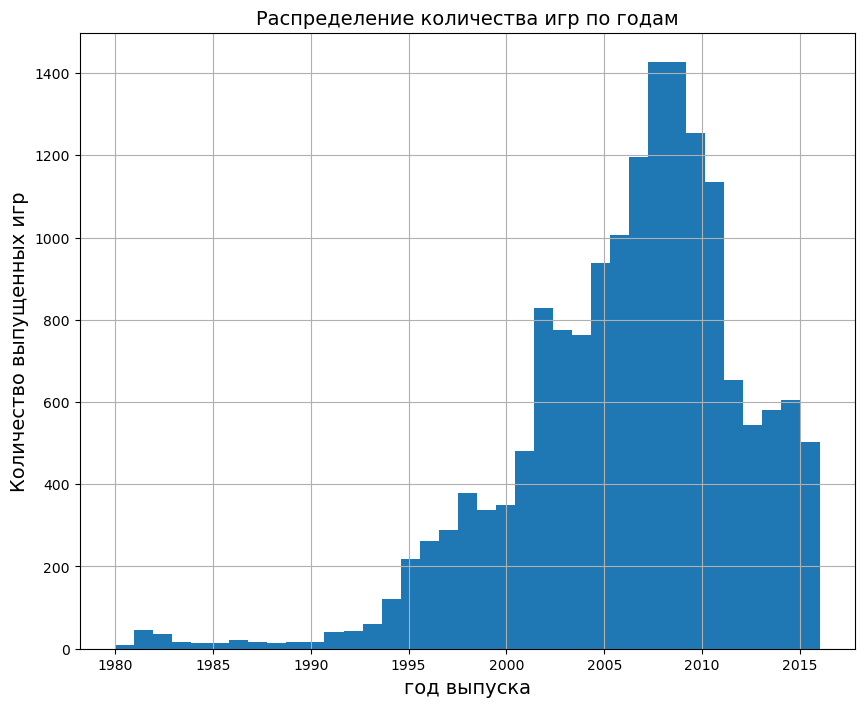

In [14]:
fig = plt.figure(figsize=(10, 8),)
plt.xlabel('год выпуска', fontsize=14)
plt.ylabel('Количество выпущенных игр', fontsize=14)
plt.title('Распределение количества игр по годам', fontsize=14)
data['year_of_release'].hist(bins=37)
data.head(5)

Необходимо использовать данные  с 1995г. т.к до 1995 было выпущено  мало игр по отношению к следующим годам. Этиданные выбиваются изобщего массива. Больше всего выпущенных игр было в период с 2007-2009г. 

### 3.1 Измение продаж по годам

'Актуальность платформы'

8.4

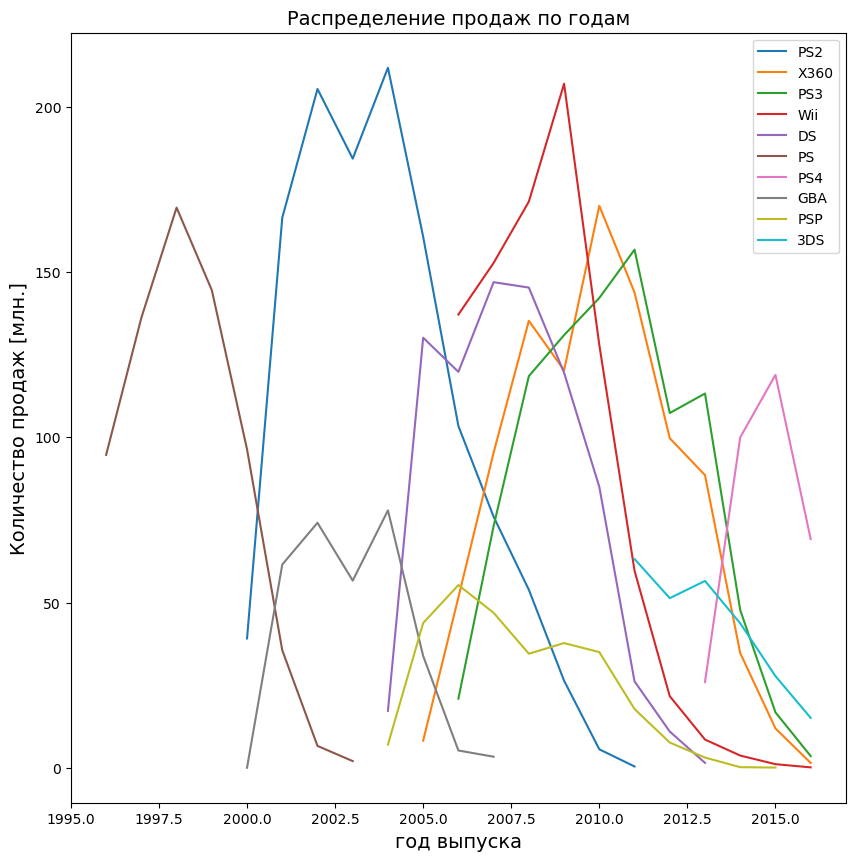

,begin_years,end_years
platform,,
PS,1996.0,2003.0
PS2,2000.0,2011.0
GBA,2000.0,2007.0
DS,2004.0,2013.0
PSP,2004.0,2015.0
X360,2005.0,2016.0
PS3,2006.0,2016.0
Wii,2006.0,2016.0
3DS,2011.0,2016.0


In [15]:
#Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. 
#За какой характерный срок появляются новые и исчезают старые платформы? 
top10 = data[data['year_of_release'] > 1995].groupby('platform')['sales_sum'].sum().sort_values(ascending=False)[:10] 
top10_group = data[data['year_of_release'] > 1995].groupby(['platform','year_of_release'])['sales_sum'].sum().reset_index()
fig = plt.figure(figsize=(10, 10))
plt.xlabel('год выпуска', fontsize=14)
plt.ylabel('Количество продаж [млн.]', fontsize=14)
plt.title('Распределение продаж по годам', fontsize=14)
begin_years = [] 
end_years = [] 
for i in top10.index:
    plt.plot(top10_group[top10_group['platform'] == i]['year_of_release'],top10_group[top10_group['platform'] == i]['sales_sum'],label=i)
    plt.legend()
    #начало продаж
    begin_years.append(top10_group[top10_group['platform'] == i]['year_of_release'].min())
    #конец продаж
    end_years.append(top10_group[top10_group['platform'] == i]['year_of_release'].max())
period_platform = pd.DataFrame({'begin_years': begin_years,'end_years':end_years}, index = top10.index).sort_values(by='begin_years')
display('Актуальность платформы', (period_platform['end_years'] - period_platform['begin_years']).mean())
plt.show()    
period_platform

In [16]:
#Новейшие платформы
data[data['year_of_release'] > 2015]['platform'].unique()

array(['PS4', '3DS', 'XOne', 'WiiU', 'PS3', 'PC', 'X360', 'PSV', 'Wii'],
      dtype=object)

В среднем каждые 4 года появляется новая платформа. Всреднем платформа исчезает через 8.5 лет. Лидирует по продажам PS2, X360, PS3. Все платформы первые 2 года растут по продажам, далее наблюдается спад продаж. 

### 3.3 Определение актуального периода 

In [17]:
data = data[data['year_of_release'] > 2012]

Общий тренд распределения попродажам меняется с 2013г. Для прогноза можно взять актуальный период  2013-2016

3.4 Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.За актуальный период

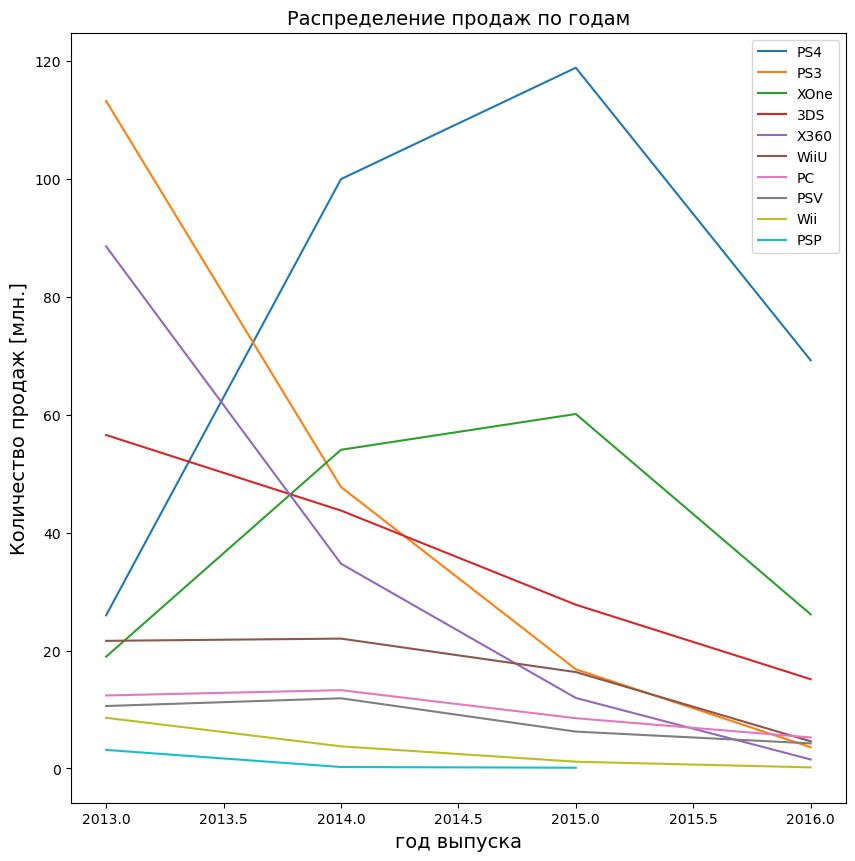

In [18]:
top10 = data.groupby('platform')['sales_sum'].sum().sort_values(ascending=False)[:10] 
top10_group = data.groupby(['platform','year_of_release'])['sales_sum'].sum().reset_index()
fig = plt.figure(figsize=(10, 10))
plt.xlabel('год выпуска', fontsize=14)
plt.ylabel('Количество продаж [млн.]', fontsize=14)
plt.title('Распределение продаж по годам', fontsize=14)
begin_years = [] 
end_years = [] 
for i in top10.index:
    plt.plot(top10_group[top10_group['platform'] == i]['year_of_release'],top10_group[top10_group['platform'] == i]['sales_sum'],label=i)
    plt.legend()
plt.show()    

Из полученного графика можно сказать, что по продажам лидируют PS4, XOne, 3DS. Потенциально прибыльные прибыльные платформы PS4, XOne, т.к за указанный период есть точки подьёма, платформы новые, а актуальность платформы равна 8.5 лет. У остальный платформ наблюдается постоянный спад, пожтому их нельзя назвать потенциально прибыльными.

,sales_sum
platform,
DS,1.54
PSP,3.50
Wii,13.66
PSV,32.99
PC,39.43
WiiU,64.63
X360,136.80
3DS,143.25
XOne,159.32


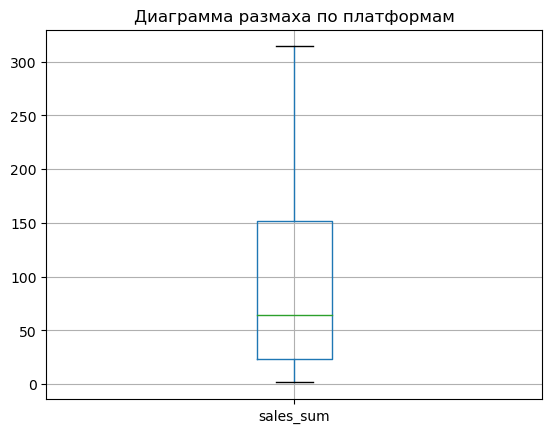

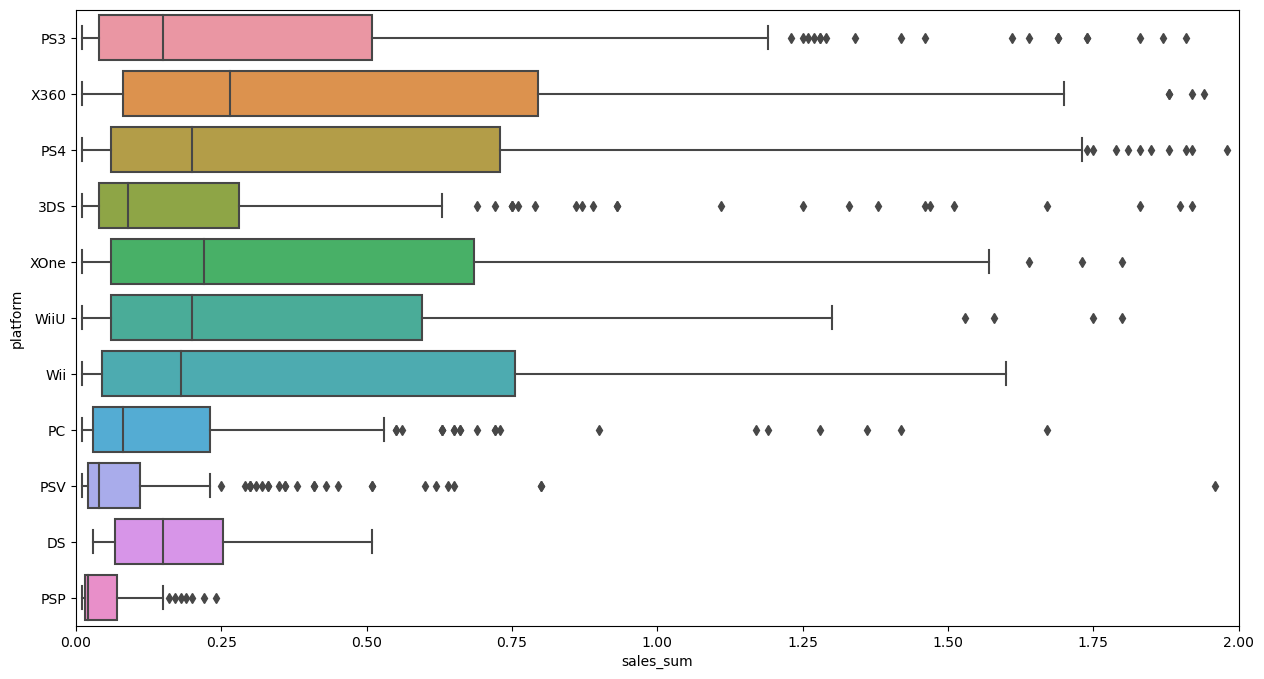

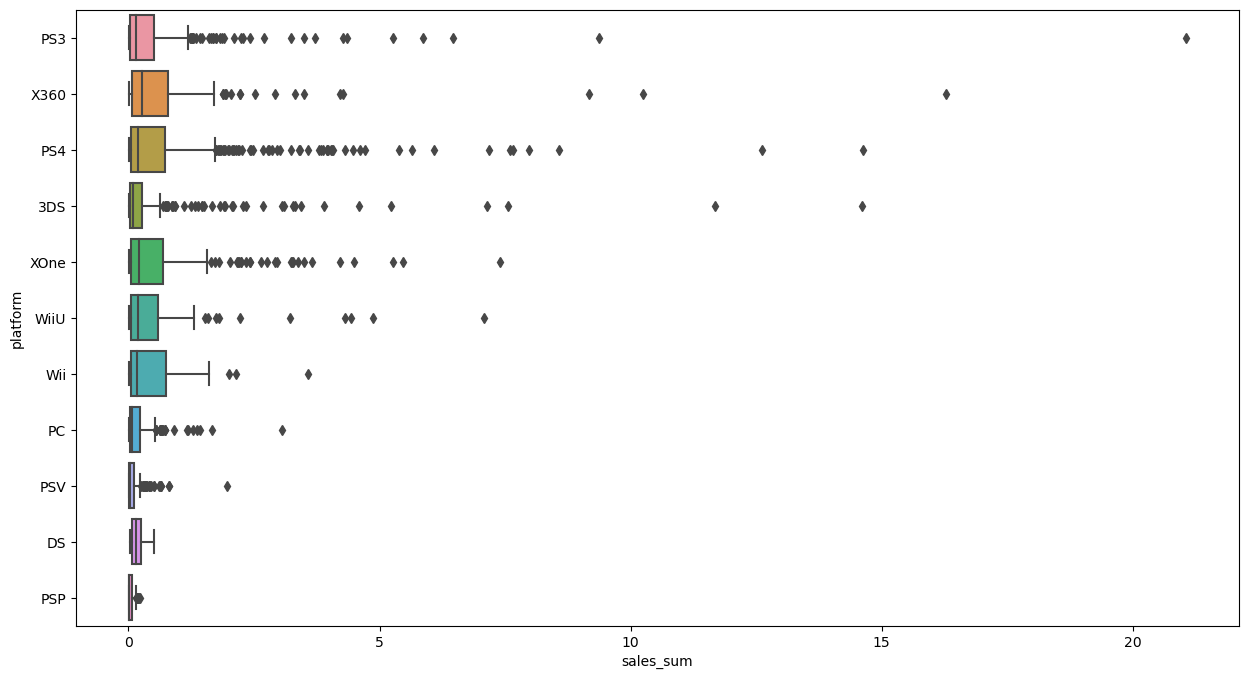

In [19]:
#Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
plt.title("Диаграмма размаха по платформам")
data.pivot_table(index='platform', values='sales_sum', aggfunc='sum').boxplot()
plt.figure(figsize=(15,8))
plt.xlim(right=2)
sns.boxplot(data= data, x='sales_sum', y='platform')
plt.figure(figsize=(15,8))
sns.boxplot(data= data, x='sales_sum', y='platform')
data.pivot_table(index='platform', values='sales_sum', aggfunc='sum').sort_values(by='sales_sum')

Больше всего продаж у PS4, X360, Wii, XOne, медианные значения у данных платформ находятся на одном уровне Меньше всего продаж у DC и PSP. Выбросами можно считать значения выше 5млн. 

### 3.6 Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы. Соотнесите выводы с продажами игр на других платформах.

'коэффициент корреляции Пирсона(оценка критиков)PS4:'

0.40589480145836687

'коэффициент корреляции Пирсона(оценка пользователей)PS4:'

-0.031957110204556424

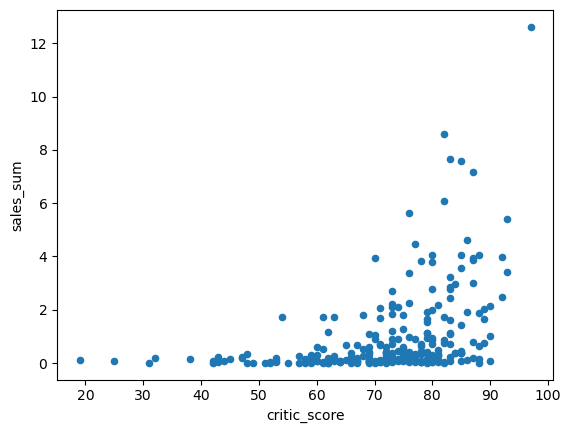

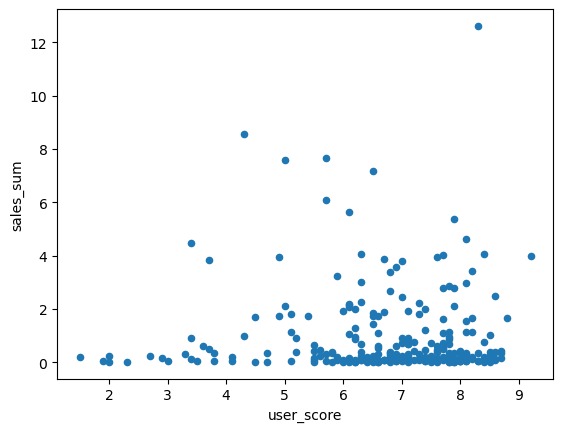

'коэффициент корреляции Пирсона(оценка критиков)XOne:'

0.4104220356129637

'коэффициент корреляции Пирсона(оценка пользователей)XOne:'

-0.06892505328279412

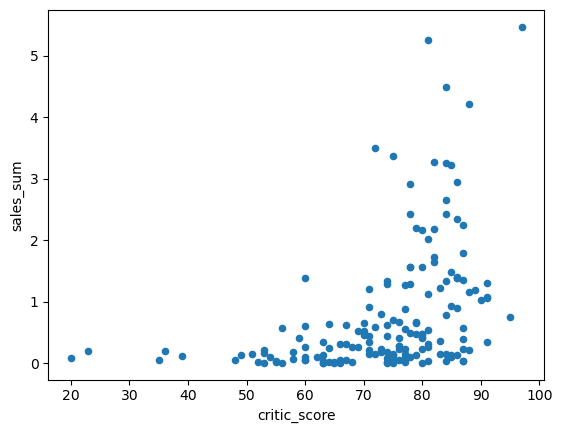

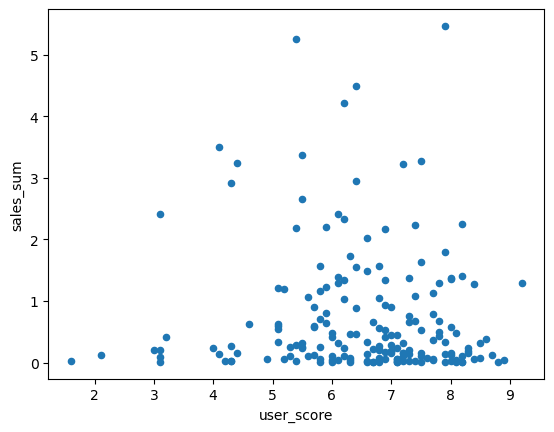

'коэффициент корреляции Пирсона(оценка критиков)X360:'

0.3503445460228664

'коэффициент корреляции Пирсона(оценка пользователей)X360:'

-0.011742185147181342

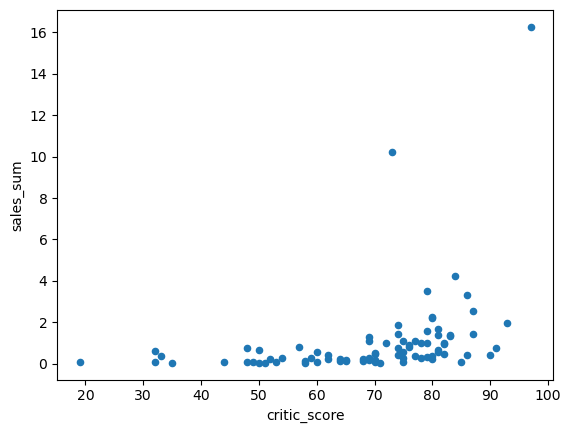

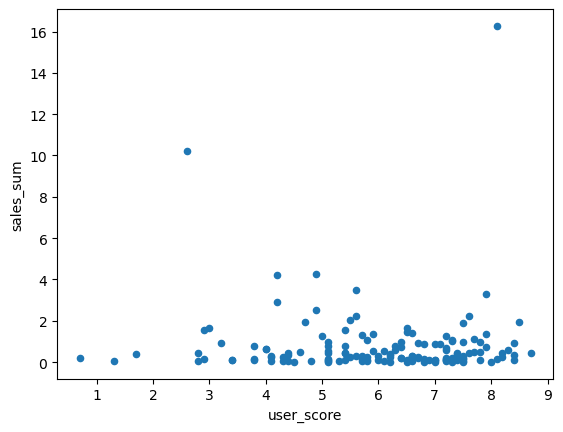

'коэффициент корреляции Пирсона(оценка критиков)3DS:'

0.33923492878531464

'коэффициент корреляции Пирсона(оценка пользователей)3DS:'

0.24150411773563016

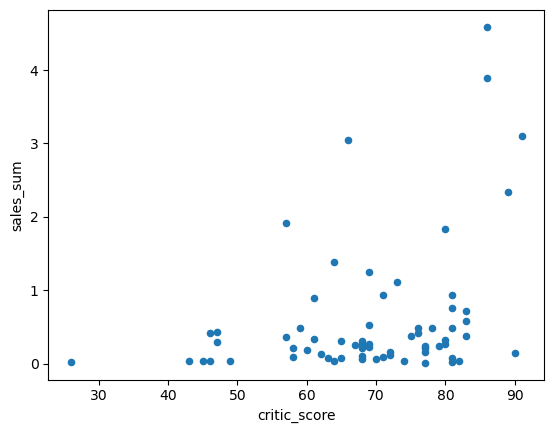

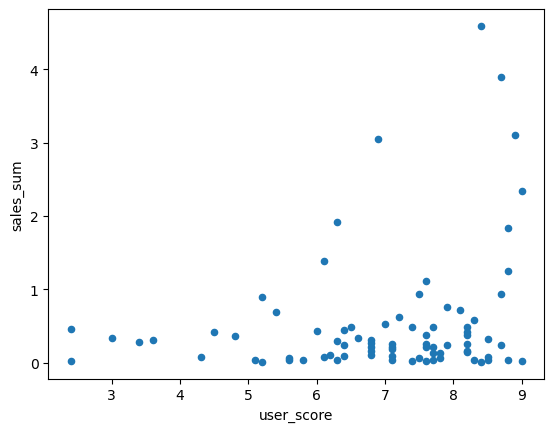

'коэффициент корреляции Пирсона(оценка критиков)PS3:'

0.3338066356506173

'коэффициент корреляции Пирсона(оценка пользователей)PS3:'

0.0023944027357566925

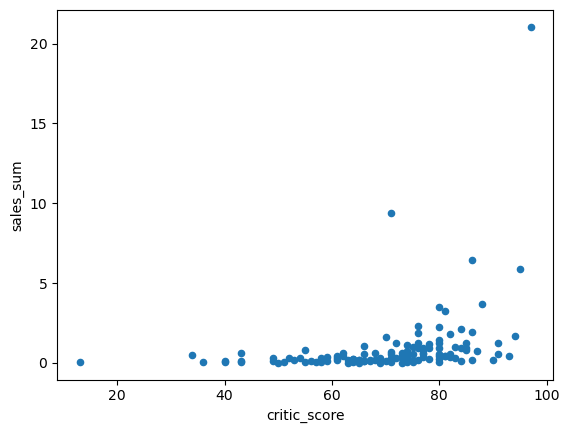

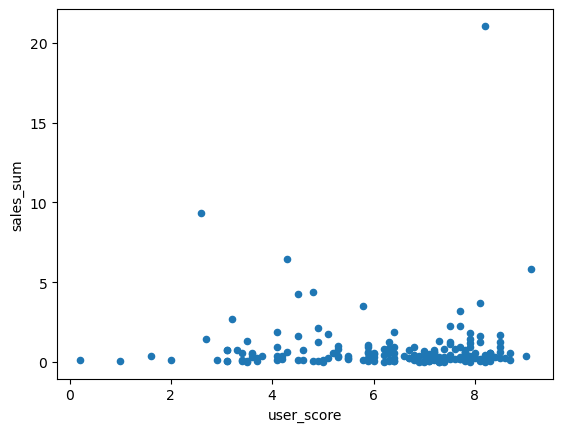

In [20]:
#Влияние отзывов на продажи
top_platform_name = ['PS4', 'XOne', 'X360', '3DS', 'PS3']
for i in top_platform_name:
    top_platform = data.loc[(data['platform'] == i) & (data['user_score'] > 0)].copy()
    top_platform.plot(x='critic_score', y='sales_sum', kind='scatter')
    top_platform.plot(x='user_score', y='sales_sum', kind='scatter')
    display(f'коэффициент корреляции Пирсона(оценка критиков){i}:' , top_platform['sales_sum'].corr(top_platform['critic_score']))
    display(f'коэффициент корреляции Пирсона(оценка пользователей){i}:' , top_platform['sales_sum'].corr(top_platform['user_score']))
    plt.show() 

Во всех случаях корреляция присутствует. По данным можно сделать вывод, что оценка критиков сильнее влияет на продажи, коэффициент корреляции в диапазоне(0.33-0.42). Влияние оценок пользователей практически не влияет на продажи, коэффициент корреляции близок к 0. Только для платформы 3DS заметно положительнок влияние оценок пользователей на продажи.

<Axes: xlabel='genre'>

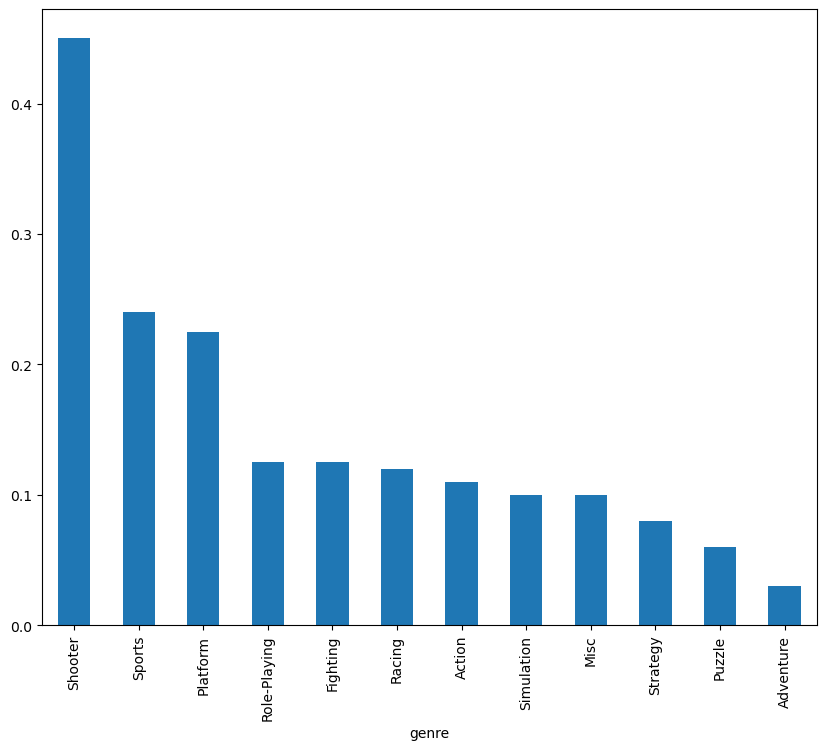

In [21]:
data.groupby('genre')['sales_sum'].median().sort_values(ascending=False).plot(kind='bar', figsize=(10,8))

# Шаг 4. Составление портрета пользователя каждого региона

4.1 Самые популярные платформы (топ-5). Опишите различия в долях продаж.

platform
PS4     24.842933
XOne    21.274360
X360    18.656188
PS3     14.507322
3DS      8.727239
Name: na_sales, dtype: float64

platform
PS4     35.971241
PS3     17.288326
XOne    13.152997
X360    10.840578
3DS      7.893328
Name: eu_sales, dtype: float64

platform
3DS     48.167353
PS3     16.586163
PSV     13.205001
PS4     11.336838
WiiU     7.728371
Name: jp_sales, dtype: float64

platform
PS4     40.301742
PS3     22.313912
XOne    11.894640
X360    10.094190
3DS      5.234642
Name: other_sales, dtype: float64

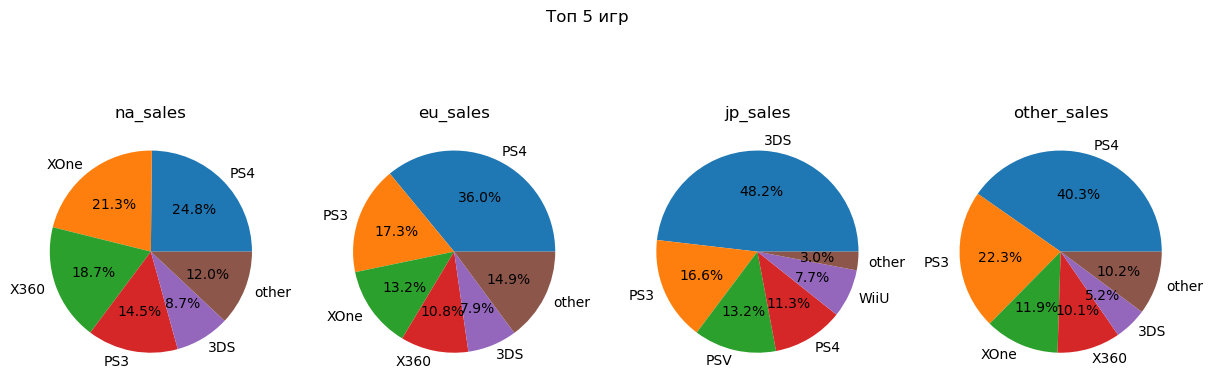

In [22]:
#Самые популярные платформы (топ-5).
region_all = ['na_sales', 'eu_sales', 'jp_sales','other_sales']
fig, axes = plt.subplots (nrows = 1, ncols = 4, figsize = (15, 5))
fig.suptitle('Топ 5 игр')
k = 0
for i in region_all: 
    display(data.groupby('platform')[i].sum().sort_values(ascending=False)[:5]/data[i].sum()*100)
    region = data.groupby('platform')[i].sum().sort_values(ascending=False)[:5]/data[i].sum()*100
    percent = list(region.values) 
    genre = list(region.index)   
    percent_other = 100
    for j in percent:
        percent_other -= float(j)
    percent.append(percent_other)
    genre.append('other')
    axes[k].set_title(i)
    axes[k].pie(percent, labels = genre, autopct='%1.1f%%')
    k += 1  
plt.show()    

Самая популярная платформа в Северной Америке PS4, доля продаж составляет 25%. 
Самая популярная платформа в Европе PS4, доля продаж составляет 35%. 
Самая популярная платформа в Японии 3DS, доля продаж составляет 48%. 
Самая популярная платформа в других регионах PS4, доля продаж составляет 40%. 

4.2 Самые популярные жанры (топ-5). Поясните разницу.

genre
Action          28.797606
Shooter         25.071394
Sports          14.911700
Role-Playing    10.600626
Misc             6.280414
Name: na_sales, dtype: float64

genre
Action          30.117533
Shooter         22.400122
Sports          15.429722
Role-Playing     9.425592
Racing           5.147490
Name: eu_sales, dtype: float64

genre
Role-Playing    36.255150
Action          28.761188
Misc             6.535019
Fighting         5.434011
Shooter          4.695269
Name: jp_sales, dtype: float64

genre
Action          31.007752
Shooter         23.980995
Sports          16.212386
Role-Playing     9.569059
Misc             5.076269
Name: other_sales, dtype: float64

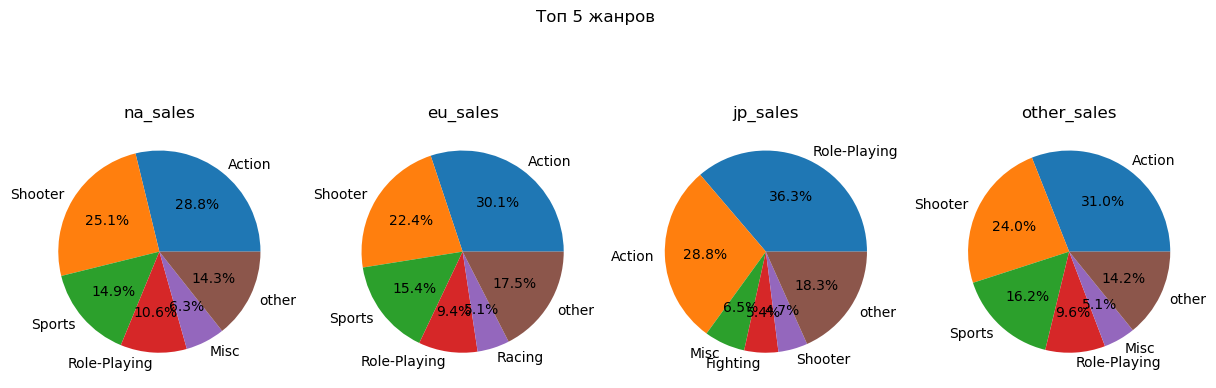

In [23]:
#Самые популярные жанры (топ-5)
region_all = ['na_sales', 'eu_sales', 'jp_sales','other_sales']
fig, axes = plt.subplots (nrows = 1, ncols = 4, figsize = (15, 5))
fig.suptitle('Топ 5 жанров')
k = 0
for i in region_all: 
    display(data.groupby('genre')[i].sum().sort_values(ascending=False)[:5]/data[i].sum()*100)
    region = data.groupby('genre')[i].sum().sort_values(ascending=False)[:5]/data[i].sum()*100
    percent = list(region.values) 
    genre = list(region.index)   
    percent_other = 100
    for j in percent:
        percent_other -= float(j)
    percent.append(percent_other)
    genre.append('other')
    axes[k].set_title(i)
    axes[k].pie(percent, labels = genre, autopct='%1.1f%%')
    k += 1  
plt.show()     

Самый популярный жанр в Северной Америке, Европе, других регионах является 'Action'. В Японии 'Role-Playing'

4.3 Влияет ли рейтинг ESRB на продажи в отдельном регионе?

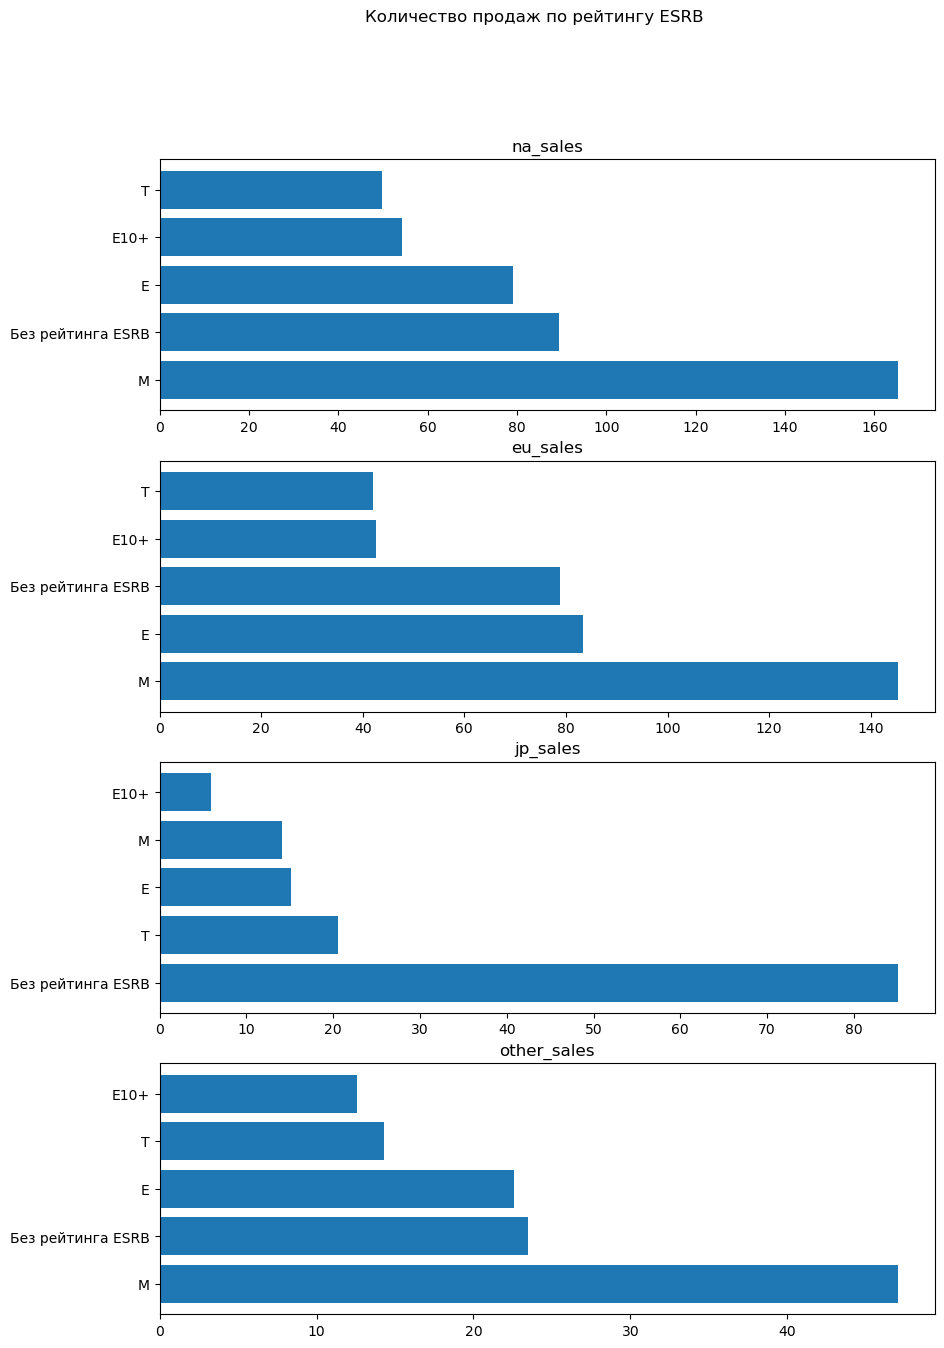

In [24]:
#Зависимость рейтинга ESRB на продажи в отдельном регионе
region_all = ['na_sales', 'eu_sales', 'jp_sales','other_sales']
data = data.fillna('Без рейтинга ESRB')
fig, axes = plt.subplots (nrows = 4, ncols = 1, figsize = (10, 15))
fig.suptitle('Количество продаж по рейтингу ESRB')
k = 0
for i in region_all: 
    region = data.groupby('rating')[i].sum().sort_values(ascending=False)
    axes[k].set_title(i)
    axes[k].barh(region.index, region.values, )
    k += 1  
plt.show()         

In [25]:
# Комментарий ревьюера
temp = data.copy()
print(temp.rating.isna().sum(), temp.rating.isna().sum()/len(temp))
temp.rating.value_counts()

0 0.0


Без рейтинга ESRB    977
M                    369
T                    333
E                    302
E10+                 252
Name: rating, dtype: int64

Во всех регионах, кроме Японии максимальные продажи у игр с рейтингом M. В Японии Без указаного рейтинга, т.к рейтинг указывается для игр для США и Канады.  

# Шаг 5. Проверьте гипотезы

### 5.1 Проверьте гипотезу:  Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Нулевая гепотиза: Средние пользовательские рейтинги Xone и Pc одинаковые
Альтернативная: Средние пользовательские рейтинги Xone и Pc разные

In [26]:
data_game = data[data['user_score'] > 0]
data_pc = data_game[data_game['platform'] == 'XOne']['user_score']
data_xone = data_game[data_game['platform'] == 'PC']['user_score']
alpha = 0.05
results = st.ttest_ind(data_pc,data_xone)
display('p-value:', results.pvalue)
if (results.pvalue < alpha):
    display('Отвергаем нулевую гипотезу')
else:
    display('Не получилось отвергнуть нулевую гипотезу')

'p-value:'

0.14012658403611647

'Не получилось отвергнуть нулевую гипотезу'

Значение p-value равно 14%. Не получилось опровергнуть Нулевую гипотезу. С вероятностью в 14% можно получить различие в рейтингах на платформах Xbox One и PC

### 5.2 Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

Нулевая гепотиза: Средние пользовательские рейтинги жанров Action и Sports одинаковые Альтернативная: Средние пользовательские рейтинги жанров Action и Sports разные

In [27]:
data_action = data_game[data_game['genre'] == 'Action']['user_score']
data_sports = data_game[data_game['genre'] == 'Sports']['user_score']
alpha = 0.05
results = st.ttest_ind(data_action, data_sports)
display('p-value:', results.pvalue)
if (results.pvalue < alpha):
    display('Отвергаем нулевую гипотезу')
else:
    display('Не получилось отвергнуть нулевую гипотезу')

'p-value:'

1.0517832389140023e-27

'Отвергаем нулевую гипотезу'

Значение p-value менее 5%. Отвергаем нулевую гипотезу. Это означает, что с вероятностью близкой к 0 средние пользовательские рейтинги жанров Action и Sports будут одинаковые.

1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые:
    Нулевая гепотиза: Средние пользовательские рейтинги Xone и Pc одинаковые 
    Альтернативная: Средние пользовательские рейтинги Xone и Pc разные
    p.value  - 0.14012658403611647
    Не получилось отвергнуть нулевую гипотезу
    p.value(показывает вероятность сформулированной гипотезы)
2. Средние пользовательские рейтинги жанров Action и Sports разные:    
    Нулевая гепотиза: Средние пользовательские рейтинги жанров Action и Sports одинаковые 
    Альтернативная: Средние пользовательские рейтинги жанров Action и Sports разные
    p.value - 1.0517832389140023e-27
    Отвергаем нулевую гипотезу

# Шаг 6. Напишите общий вывод

Оценки критиков поднимают продажи. Влияние пользовательских оценок гораздо ниже.
Самым популярным жанром  является 'Shooter'. Самым непопулярным 'Adventure'. 
Самой популярной платформой является PS4.
Перспективными платформами является Xone и PS4. 
В среднем новая платформа на рынке 8-9 лет.
Каждые 3-4 года полявляется новая платформа.
Необходимо выпускать игры в жанре "Shooter" на "PS4" с рейтингом M для высоких продаж.